In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
import helpers

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train = pd.concat([train, test], axis=0)

In [5]:
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [6]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [7]:
train[train.LotFrontage.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,8,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NaN,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
12,912,0,0,NaN,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,1.0,0.0,TA,175.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,NaN,NaN,0,CBlock,1,Typ,352.0,1.0,TA,Unf,TA,Detchd,1962.0,912,0,GasA,TA,1Story,13,1,TA,Lvl,Gtl,12968,Inside,NaN,IR2,0,20,RL,0.0,None,NaN,0,9,Sawyer,0,6,5,Y,0,NaN,CompShg,Hip,Normal,144000.0,WD,176,Pave,4,912.0,AllPub,140,1962,1962,2008
14,1253,0,0,NaN,2,1Fam,TA,No,733.0,0.0,BLQ,Unf,1.0,0.0,TA,520.0,Y,Norm,Norm,SBrkr,176,TA,TA,MetalSd,MetalSd,GdWo,Fa,1,CBlock,1,Typ,352.0,1.0,TA,RFn,TA,Attchd,1960.0,1253,1,GasA,TA,1Story,15,1,TA,Lvl,Gtl,10920,Corner,NaN,IR1,0,20,RL,212.0,BrkFace,NaN,0,5,NAmes,213,5,6,Y,0,NaN,CompShg,Hip,Normal,157000.0,WD,0,Pave,5,1253.0,AllPub,0,1960,1960,2008
16,1004,0,0,NaN,2,1Fam,TA,No,578.0,0.0,ALQ,Unf,1.0,0.0,TA,426.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NaN,TA,1,CBlock,1,Typ,480.0,2.0,TA,Fin,TA,Attchd,1970.0,1004,0,GasA,Ex,1Story,17,1,TA,Lvl,Gtl,11241,CulDSac,NaN,IR1,0,20,RL,180.0,BrkFace,Shed,700,3,NAmes,0,7,6,Y,0,NaN,CompShg,Gable,Normal,149000.0,WD,0,Pave,5,1004.0,AllPub,0,1970,1970,2010
24,1060,0,0,NaN,3,1Fam,TA,Mn,188.0,668.0,Rec,ALQ,1.0,0.0,TA,204.0,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,MnPrv,TA,1,CBlock,1,Typ,270.0,1.0,TA,Unf,TA,Attchd,1968.0,1060,0,GasA,Ex,1Story,25,1,Gd,Lvl,Gtl,8246,Inside,NaN,IR1,0,20,RL,0.0,None,NaN,0,5,Sawyer,90,8,5,Y,0,NaN,CompShg,Gable,Normal,154000.0,WD,0,Pave,6,1060.0,AllPub,406,1968,2001,2010
31,1228,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1228.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,NaN,0,CBlock,1,Typ,271.0,1.0,TA,Unf,TA,Attchd,1966.0,1228,1,GasA,Gd,1Story,32,1,Gd,Lvl,Gtl,8544,CulDSac,NaN,IR1,0,20,RL,0.0,None,NaN,0,6,Sawyer,65,6,5,Y,0,NaN,CompShg,Gable,Normal,149350.0,WD,0,Pave,6,1228.0,AllPub,0,1966,2006,2008
42,884,0,0,NaN,2,1Fam,TA,Av,747.0,93.0,ALQ,LwQ,1.0,0.0,Gd,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,NaN,0,CBlock,1,Typ,504.0,2.0,Gd,RFn,TA,Attchd,1983.0,884,0,GasA,Gd,SFoyer,43,1,Gd,Lvl,Gtl,9180,CulDSac,NaN,IR1,0,85,RL,0.0,None,NaN,0,12,SawyerW,0,7,5,Y,0,NaN,CompShg,Gable,Normal,144000.0,WD,0,Pave,5,840.0,AllPub,240,1983,1983,2007
43,938,0,0,NaN,3,1Fam,TA,Av,280.0,491.0,LwQ,BLQ,1.0,0.0,Gd,167.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,CBlock,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1977.0,938,0,GasA,TA,1Story,44,1,TA,Lvl,Gtl,9200,CulDSac,NaN,IR1,0,20,RL,0.0,None,NaN,0,7,CollgCr,0,6,5,Y,0,NaN,CompShg,Hip,Normal,130250.0,WD,0,Pave,5,938.0,AllPub,145,1975,1980,2008
50,794,676,0,NaN,3,1Fam,TA,Av,182.0,0.0,GLQ,Unf,0.0,1.0,Gd,612.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,388.0,2.0,TA,Fin,TA,Attchd,1997.0,1470,0,GasA,Gd,2Story,51,1,TA,Lvl,Gtl,13869,Corner,NaN,IR2,0,60,RL,0.0,None,NaN,0,7,Gilbert,75,6,6,Y,0,NaN,CompShg,Gable,Normal,177000.0,WD,0,Pave,6,794.0,AllPub,0,1997,1997,2007
64,1057,977,0,NaN,3,1Fam,TA,No,739.0,0

In [8]:
#imputing LotFrontage = square root of the Lot area
train.loc[train.LotFrontage.isnull(), 'LotFrontage'] =  np.sqrt(train.loc[train.LotFrontage.isnull()].LotArea)

In [9]:
train.loc[train.GarageCond.isnull(),]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
39,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.000000,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
48,736,716,0,NaN,2,2fmCon,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,736.0,Y,Norm,Norm,SBrkr,102,TA,TA,MetalSd,MetalSd,NaN,NaN,0,BrkTil,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1452,0,GasA,Gd,2Story,49,3,TA,Lvl,Gtl,4456,Inside,33.000000,Reg,0,190,RM,0.0,None,NaN,0,6,OldTown,0,5,4,N,0,NaN,CompShg,Gable,Partial,113000.0,New,0,Pave,8,736.0,AllPub,0,1920,2008,2009
78,1768,0,0,NaN,4,Duplex,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1768.0,N,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NaN,NaN,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1768,0,GasA,TA,1Story,79,2,TA,Lvl,Gtl,10778,Inside,72.000000,Reg,0,90,RL,0.0,None,NaN,0,4,Sawyer,0,5,4,Y,0,NaN,CompShg,Hip,Normal,136500.0,WD,0,Pave,8,1768.0,AllPub,0,1968,1968,2010
88,1013,0,0,NaN,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1013.0,N,Feedr,Feedr,SBrkr,156,Fa,Fa,Plywood,Plywood,MnPrv,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1526,0,GasA,TA,1.5Fin,89,1,Fa,Lvl,Gtl,8470,Corner,105.000000,IR1,513,50,C (all),0.0,None,NaN,0,10,IDOTRR,0,2,3,N,0,NaN,CompShg,Hip,Abnorml,85000.0,ConLD,0,Pave,6,1013.0,AllPub,0,1915,1982,2009
89,990,0,0,NaN,3,1Fam,TA,No,588.0,0.0,GLQ,Unf,1.0,0.0,Gd,402.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,990,0,GasA,Ex,1Story,90,1,TA,Lvl,Gtl,8070,Inside,60.000000,Reg,0,20,RL,0.0,None,NaN,0,8,CollgCr,0,5,4,Y,0,NaN,CompShg,Gable,Normal,123600.0,WD,0,Pave,5,990.0,AllPub,0,1994,1995,2007
99,1225,0,0,NaN,3,1Fam,TA,No,569.0,0.0,ALQ,Unf,1.0,0.0,TA,381.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1225,1,GasA,Fa,1Story,100,1,TA,Lvl,Gtl,9320,Inside,77.000000,IR1,0,20,RL,0.0,None,Shed,400,1,NAmes,0,5,4,Y,0,NaN,CompShg,Gable,Normal,128950.0,WD,0,Pave,6,950.0,AllPub,352,1959,1959,2010
108,997,520,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,793.0,N,Artery,Norm,FuseF,144,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1517,0,GasW,TA,1.5Fin,109,1,Fa,Lvl,Gtl,8500,Corner,85.000000,Reg,0,50,RM,0.0,None,NaN,0,8,IDOTRR,0,7,5,N,0,NaN,CompShg,Gable,Normal,115000.0,WD,0,Pave,7,793.0,AllPub,0,1919,2005,2007
125,520,0,0,NaN,2,2fmCon,TA,Av,490.0,0.0,GLQ,Unf,1.0,0.0,TA,30.0,N,Norm,Norm,SBrkr,0,Fa,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,754,0,GasA,Gd,1.5Fin,126,1,TA,Lvl,Gtl,6780,Inside,60.000000,Reg,234,190,RM,0.0,None,NaN,0,6,IDOTRR,0,8,6,N,0,NaN,CompShg,Gable,Normal,84500.0,WD,0,Pave,5,520.0,AllPub,53,1935,1982,2006
127,840,0,0,NaN,3,1Fam,TA,No,116.0,0.0,LwQ,Unf,0.0,0.0,TA,556.0,Y,Feedr,Norm,SBrkr,0,Gd,TA,WdShing,Wd Sdng,NaN,TA,1,BrkTil,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,840,0,GasA,Ex,1.5Unf,128,1,TA,Bnk,Gtl,4388,Inside,55.000000,IR1,0,45,RM,0.0,None,NaN,0,6,OldTown,0,7,5,N,0,NaN,CompShg,Gable,Normal,87000.0,WD,0,Pave,5,672.0,AllPub,0,1930,1950,2007
140,864,0,0,NaN,3,1Fam,TA,No,432.0,0.0,ALQ,Unf,0.0,0.0,TA,

In [10]:
train.loc[train.MasVnrArea.isnull(),]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,NaN,4,1Fam,TA,No,625.0,0.0,GLQ,Unf,1.0,0.0,Gd,235.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,2,PConc,2,Typ,440.0,2.0,TA,Fin,TA,BuiltIn,2002.0,1960,1,GasA,Ex,2Story,235,1,Gd,Lvl,Gtl,7851,Inside,88.605869,Reg,0,60,RL,NaN,NaN,NaN,0,5,Gilbert,48,5,6,Y,0,NaN,CompShg,Gable,Normal,216500.0,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
529,2515,0,0,NaN,4,1Fam,TA,No,1219.0,0.0,Rec,Unf,1.0,0.0,TA,816.0,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,NaN,TA,2,PConc,3,Maj1,484.0,2.0,TA,RFn,TA,Attchd,1975.0,2515,0,GasA,TA,1Story,530,2,TA,Lvl,Gtl,32668,CulDSac,180.742911,IR1,0,20,RL,NaN,NaN,NaN,0,3,Crawfor,0,3,6,Y,0,NaN,CompShg,Hip,Alloca,200624.0,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
650,822,843,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,813.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,NaN,0,PConc,2,Typ,562.0,2.0,TA,RFn,TA,Attchd,2007.0,1665,1,GasA,Ex,2Story,651,1,Gd,Lvl,Gtl,8125,Inside,65.000000,Reg,0,60,FV,NaN,NaN,NaN,0,5,Somerst,0,6,7,Y,0,NaN,CompShg,Gable,Normal,205950.0,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
936,1200,0,0,NaN,2,1Fam,TA,No,833.0,0.0,GLQ,Unf,1.0,0.0,Gd,343.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003.0,1200,0,GasA,Ex,1Story,937,1,Gd,Lvl,Gtl,10083,Inside,67.000000,Reg,0,20,RL,NaN,NaN,NaN,0,8,SawyerW,41,5,7,Y,0,NaN,CompShg,Gable,Normal,184900.0,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
973,1428,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1428.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,NaN,0,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2007.0,1428,0,GasA,Ex,1Story,974,1,Gd,Lvl,Gtl,11639,Corner,95.000000,Reg,0,20,FV,NaN,NaN,NaN,0,12,Somerst,120,5,7,Y,0,NaN,CompShg,Gable,Partial,182000.0,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008
977,1241,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,GLQ,Unf,1.0,0.0,Gd,135.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,569.0,2.0,TA,Fin,TA,Attchd,2007.0,1241,1,GasA,Ex,1Story,978,1,Gd,Lvl,Gtl,4274,Inside,35.000000,IR1,0,120,FV,NaN,NaN,NaN,0,11,Somerst,116,5,7,Y,0,NaN,CompShg,Gable,Partial,199900.0,New,0,Pave,4,1241.0,AllPub,0,2006,2007,2007
1243,2076,0,0,NaN,2,1Fam,Gd,Gd,1386.0,0.0,GLQ,Unf,1.0,0.0,Ex,690.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,850.0,3.0,TA,Fin,TA,Attchd,2006.0,2076,1,GasA,Ex,1Story,1244,1,Ex,Lvl,Gtl,13891,Inside,107.000000,Reg,0,20,RL,NaN,NaN,NaN,0,9,NridgHt,229,5,10,Y,0,NaN,CompShg,Gable,Partial,465000.0,New,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
1278,1128,903,0,NaN,3,1Fam,TA,No,804.0,0.0,GLQ,Unf,1.0,0.0,Gd,324.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,577.0,2.0,TA,RFn,TA,Attchd,2002.0,2031,1,GasA,Ex,2Story,1279,1,Gd,Lvl,Gtl,9473,Inside,75.000000,Reg,0,60,RL,NaN,NaN,NaN,0,3,CollgCr,211,5,8,Y,0,NaN,CompShg,Gable,Normal,237000.0,WD,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
231,878,1126,0,NaN,4,1Fam,TA,No,651.0,0.0,GLQ,Unf,1.0,0.0,Ex,219.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,644.0,3.0,TA,Fin,TA,BuiltIn,2002.0,2004,1,GasA,Ex,2Story,1692,1,Gd,Lvl,Gtl,12891,Corner,113.538540,IR1,0,60,RL,NaN,NaN,NaN,0,7,Gilbert,48,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,870.0,AllPub,0

In [11]:
to_fill = list(train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending = False).index)[:-3]
to_fill

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'SalePrice',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'GarageYrBlt',
 'GarageType',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Utilities',
 'Functional',
 'Electrical',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'BsmtFinSF2']

In [12]:
helpers.fill_miss(train, to_fill, 0)

In [13]:
dummies = helpers.create_dummy(train, ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'BsmtQual'], 0)

In [14]:
dummies.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MissingAlley,MissingBsmtQual,MissingFence,MissingFireplaceQu,MissingGarageType,MissingMiscFeature,MissingPoolQC
0,856,854,0,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,0,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,0,2,CollgCr,61,5,7,Y,0,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1,0,1,1,0,1,1
1,1262,0,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,0,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,0,5,Veenker,0,8,6,Y,0,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1,0,1,0,0,1,1
2,920,866,0,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,0,9,CollgCr,42,5,7,Y,0,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1
3,961,756,0,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,0,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,0,2,Crawfor,35,5,7,Y,0,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1,0,1,0,0,1,1
4,1145,1053,0,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,0,12,NoRidge,84,5,8,Y,0,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1,0,1,0,0,1,1


In [15]:
dummies.dtypes

1stFlrSF                int64
2ndFlrSF                int64
3SsnPorch               int64
Alley                  object
BedroomAbvGr            int64
BldgType               object
BsmtCond               object
BsmtExposure           object
BsmtFinSF1            float64
BsmtFinSF2            float64
BsmtFinType1           object
BsmtFinType2           object
BsmtFullBath          float64
BsmtHalfBath          float64
BsmtQual               object
BsmtUnfSF             float64
CentralAir             object
Condition1             object
Condition2             object
Electrical             object
EnclosedPorch           int64
ExterCond              object
ExterQual              object
Exterior1st            object
Exterior2nd            object
Fence                  object
FireplaceQu            object
Fireplaces              int64
Foundation             object
FullBath                int64
                       ...   
MiscVal                 int64
MoSold                  int64
Neighborho

In [16]:
#creating a pandas series of all the column names that are not numerical
categorical = pd.Series(dummies.select_dtypes(include=['object']).columns)
categorical

0             Alley
1          BldgType
2          BsmtCond
3      BsmtExposure
4      BsmtFinType1
5      BsmtFinType2
6          BsmtQual
7        CentralAir
8        Condition1
9        Condition2
10       Electrical
11        ExterCond
12        ExterQual
13      Exterior1st
14      Exterior2nd
15            Fence
16      FireplaceQu
17       Foundation
18       Functional
19       GarageCond
20     GarageFinish
21       GarageQual
22       GarageType
23          Heating
24        HeatingQC
25       HouseStyle
26      KitchenQual
27      LandContour
28        LandSlope
29        LotConfig
30         LotShape
31         MSZoning
32       MasVnrType
33      MiscFeature
34     Neighborhood
35       PavedDrive
36           PoolQC
37         RoofMatl
38        RoofStyle
39    SaleCondition
40         SaleType
41           Street
42        Utilities
dtype: object

In [17]:
#creating a mask that selects only the columns that have Ex (excellent) as a value
mask = [dummies[col].str.contains('Ex').sum()>0 for col in categorical]
to_transform = list(categorical[mask])

In [18]:
for col in to_transform:
    helpers.leveler(dummies, col, [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

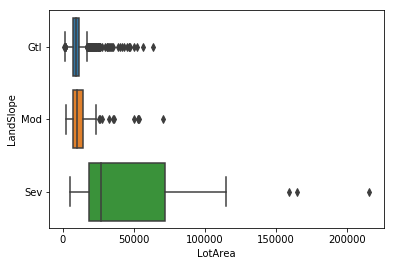

In [19]:
sns.boxplot(dummies.LotArea, dummies.LandSlope)

In [20]:
dummies.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 0], dtype=object)

In [21]:
dummies.BsmtExposure.replace('No', 1, inplace = True)

In [22]:
dummies.BsmtExposure.replace('Mn', 2, inplace = True)

In [23]:
dummies.BsmtExposure.replace('Av', 3, inplace = True)

In [24]:
dummies.BsmtExposure.replace('Gd', 4, inplace = True)

In [25]:
dummies.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 0, 'LwQ'], dtype=object)

In [26]:
helpers.leveler(dummies, 'BsmtFinType1', [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

In [27]:
helpers.leveler(dummies, 'BsmtFinType2', [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

In [28]:
dummies.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MissingAlley,MissingBsmtQual,MissingFence,MissingFireplaceQu,MissingGarageType,MissingMiscFeature,MissingPoolQC
0,856,854,0,0,3,1Fam,TA,1,706.0,0.0,6,1,1.0,0.0,4,150.0,Y,Norm,Norm,SBrkr,0,3,4,VinylSd,VinylSd,0,0,0,PConc,2,Typ,548.0,2.0,3,RFn,3,Attchd,2003.0,1710,1,GasA,5,2Story,1,1,4.0,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,0,2,CollgCr,61,5,7,Y,0,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1,0,1,1,0,1,1
1,1262,0,0,0,3,1Fam,TA,4,978.0,0.0,5,1,0.0,1.0,4,284.0,Y,Feedr,Norm,SBrkr,0,3,3,MetalSd,MetalSd,0,3,1,CBlock,2,Typ,460.0,2.0,3,RFn,3,Attchd,1976.0,1262,0,GasA,5,1Story,2,1,3.0,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,0,5,Veenker,0,8,6,Y,0,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1,0,1,0,0,1,1
2,920,866,0,0,3,1Fam,TA,2,486.0,0.0,6,1,1.0,0.0,4,434.0,Y,Norm,Norm,SBrkr,0,3,4,VinylSd,VinylSd,0,3,1,PConc,2,Typ,608.0,2.0,3,RFn,3,Attchd,2001.0,1786,1,GasA,5,2Story,3,1,4.0,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,0,9,CollgCr,42,5,7,Y,0,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1
3,961,756,0,0,3,1Fam,Gd,1,216.0,0.0,5,1,1.0,0.0,3,540.0,Y,Norm,Norm,SBrkr,272,3,3,Wd Sdng,Wd Shng,0,4,1,BrkTil,1,Typ,642.0,3.0,3,Unf,3,Detchd,1998.0,1717,0,GasA,4,2Story,4,1,4.0,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,0,2,Crawfor,35,5,7,Y,0,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1,0,1,0,0,1,1
4,1145,1053,0,0,4,1Fam,TA,3,655.0,0.0,6,1,1.0,0.0,4,490.0,Y,Norm,Norm,SBrkr,0,3,4,VinylSd,VinylSd,0,3,1,PConc,2,Typ,836.0,3.0,3,RFn,3,Attchd,2000.0,2198,1,GasA,5,2Story,5,1,4.0,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,0,12,NoRidge,84,5,8,Y,0,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1,0,1,0,0,1,1


       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [29]:
helpers.leveler(dummies, 'Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])

In [30]:
prepared = dummies.copy()

In [31]:
prepared.MSSubClass =  prepared.MSSubClass.astype('str')

In [32]:
prepared = prepared.set_index('Id')

In [33]:
from sklearn import tree

In [34]:
model = tree.DecisionTreeRegressor()

In [35]:
train_y = np.array(prepared.SalePrice)
train_y

array([ 208500.,  181500.,  223500., ...,       0.,       0.,       0.])

In [36]:
train_x = np.array(prepared.loc[:,prepared.columns !='SalePrice'])
train_x

array([[856, 854, 0, ..., 0, 1, 1],
       [1262, 0, 0, ..., 0, 1, 1],
       [920, 866, 0, ..., 0, 1, 1],
       ..., 
       [1224, 0, 0, ..., 0, 1, 1],
       [970, 0, 0, ..., 1, 0, 1],
       [996, 1004, 0, ..., 0, 1, 1]], dtype=object)

In [37]:
categorical = pd.Series(dummies.select_dtypes(include=['object']).columns)
categorical

0             Alley
1          BldgType
2          BsmtCond
3        CentralAir
4        Condition1
5        Condition2
6        Electrical
7       Exterior1st
8       Exterior2nd
9             Fence
10       Foundation
11     GarageFinish
12       GarageType
13          Heating
14       HouseStyle
15      LandContour
16        LandSlope
17        LotConfig
18         LotShape
19         MSZoning
20       MasVnrType
21      MiscFeature
22     Neighborhood
23       PavedDrive
24         RoofMatl
25        RoofStyle
26    SaleCondition
27         SaleType
28           Street
29        Utilities
dtype: object

In [38]:
messsy = prepared.copy()

In [39]:
for col in categorical:
    temp = pd.get_dummies(prepared[col], prefix = col)
    temp = temp.drop(temp.columns[0], axis=1)
    prepared = pd.concat([prepared.drop(col, axis=1), temp], axis=1)


In [40]:
prepared.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,...,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,1,706.0,0.0,6,1,1.0,0.0,4,150.0,0,3,4,0,0,2,7,548.0,2.0,3,3,2003.0,1710,1,5,1,4.0,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,208500.0,0,8,856.0,0,2003,2003,2008,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
2,1262,0,0,3,4,978.0,0.0,5,1,0.0,1.0,4,284.0,0,3,3,3,1,2,7,460.0,2.0,3,3,1976.0,1262,0,5,1,3.0,9600,80.0,0,20,0.0,0,5,0,8,6,0,0,181500.0,0,6,1262.0,298,1976,1976,2007,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
3,920,866,0,3,2,486.0,0.0,6,1,1.0,0.0,4,434.0,0,3,4,3,1,2,7,608.0,2.0,3,3,2001.0,1786,1,5,1,4.0,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,223500.0,0,6,920.0,0,2001,2002,2008,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
4,961,756,0,3,1,216.0,0.0,5,1,1.0,0.0,3,540.0,272,3,3,4,1,1,7,642.0,3.0,3,3,1998.0,1717,0,4,1,4.0,9550,60.0,0,70,0.0,0,2,35,5,7,0,0,140000.0,0,7,756.0,0,1915,1970,2006,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5,1145,1053,0,4,3,655.0,0.0,6,1,1.0,0.0,4,490.0,0,3,4,3,1,2,7,836.0,3.0,3,3,2000.0,2198,1,5,1,4.0,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,250000.0,0,9,1145.0,192,2000,2000,2008,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [41]:
categorical = pd.Series(prepared.select_dtypes(include=['object']).columns)
categorical

0    MSSubClass
dtype: object

In [42]:
prepared = prepared.drop('MSSubClass', axis=1)

In [43]:
from sklearn.linear_model import LassoCV

In [44]:
helpers.fill_miss(prepared, ['MasVnrArea'], 0)

In [67]:
len(prepared[prepared.SalePrice != 0])

1460

In [68]:
test_prep=prepared[prepared.SalePrice == 0]
train_prep=prepared[prepared.SalePrice != 0]
len(test_prep)

1459

In [112]:
train_y = np.log(np.array(train_prep.SalePrice))
train_y

array([ 12.24769432,  12.10901093,  12.31716669, ...,  12.49312952,
        11.86446223,  11.90158345])

In [113]:
train_x = np.array(train_prep.loc[:,prepared.columns !='SalePrice'])
train_x

array([[  8.56000000e+02,   8.54000000e+02,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.26200000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  9.20000000e+02,   8.66000000e+02,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.18800000e+03,   1.15200000e+03,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.07800000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.25600000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [114]:
test_x = np.array(test_prep.loc[:,prepared.columns !='SalePrice'])
test_x

array([[  8.96000000e+02,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.32900000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  9.28000000e+02,   7.01000000e+02,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.22400000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  9.70000000e+02,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  9.96000000e+02,   1.00400000e+03,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [115]:
lasso_reg = LassoCV(random_state=0, normalize=False, eps = 0.0001, max_iter=10000)
mod = lasso_reg.fit(train_x, train_y)
mod.score(train_x, train_y)

0.79560581003680597

In [116]:
lasso_reg2 = LassoCV(random_state=0, normalize=True, eps = 0.0001, max_iter=10000)
mod2 = lasso_reg2.fit(train_x, train_y)
mod2.score(train_x, train_y)

0.91052576193287804

In [117]:
test = prepared[prepared.SalePrice == 0]
test.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtExposure             0
BsmtFinSF1               1
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
EnclosedPorch            0
ExterCond                0
ExterQual                0
FireplaceQu              0
Fireplaces               0
FullBath                 0
Functional               0
GarageArea               0
GarageCars               0
GarageCond               0
GarageQual               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
HeatingQC                0
KitchenAbvGr             0
KitchenQual              1
                        ..
PavedDrive_P             0
PavedDrive_Y             0
RoofMatl_CompShg         0
RoofMatl_Membran         0
RoofMatl_Metal           0
RoofMatl_Roll            0
R

In [118]:
test = test.drop('SalePrice', axis=1)

In [123]:
test.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtExposure             0
BsmtFinSF1               1
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
EnclosedPorch            0
ExterCond                0
ExterQual                0
FireplaceQu              0
Fireplaces               0
FullBath                 0
Functional               0
GarageArea               0
GarageCars               0
GarageCond               0
GarageQual               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
HeatingQC                0
KitchenAbvGr             0
KitchenQual              1
                        ..
PavedDrive_P             0
PavedDrive_Y             0
RoofMatl_CompShg         0
RoofMatl_Membran         0
RoofMatl_Metal           0
RoofMatl_Roll            0
R

In [126]:
helpers.fill_miss(test, ['BsmtFinSF1','KitchenQual'], 0)

In [127]:
pd.DataFrame(mod2.predict(test))

,0
0,11.665170
1,11.910106
2,12.064630
3,12.183303
4,12.224850
5,12.057622
6,12.108579
7,12.029326
8,12.166339
9,11.705095


In [128]:
results=round(np.exp((pd.DataFrame(mod2.predict(test)))),3)
results.columns=['SalePrice']
results = results.set_index(test.index)
results.to_csv('linear2.csv')